In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [97]:
# from google.colab import drive
# drive.mount('/content/drive')

In [98]:
df=pd.read_csv("./dataset/crop_recommendation_dataset.csv")
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Lúa
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Lúa
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Lúa
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Lúa
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Lúa


In [99]:
label_counts = df['label'].value_counts()
label_counts

label
Lúa             100
Ngô             100
Đay             100
Bông            100
Dừa             100
Đu đủ           100
Cam             100
Táo             100
Dưa lê          100
Dưa hấu         100
Nho             100
Xoài            100
Chuối           100
Lựu             100
Đậu lăng        100
Đậu đen         100
Đậu xanh        100
Đậu bạc         100
Đậu gà          100
Đậu đỏ          100
Đậu chickpea    100
Cà phê          100
Name: count, dtype: int64

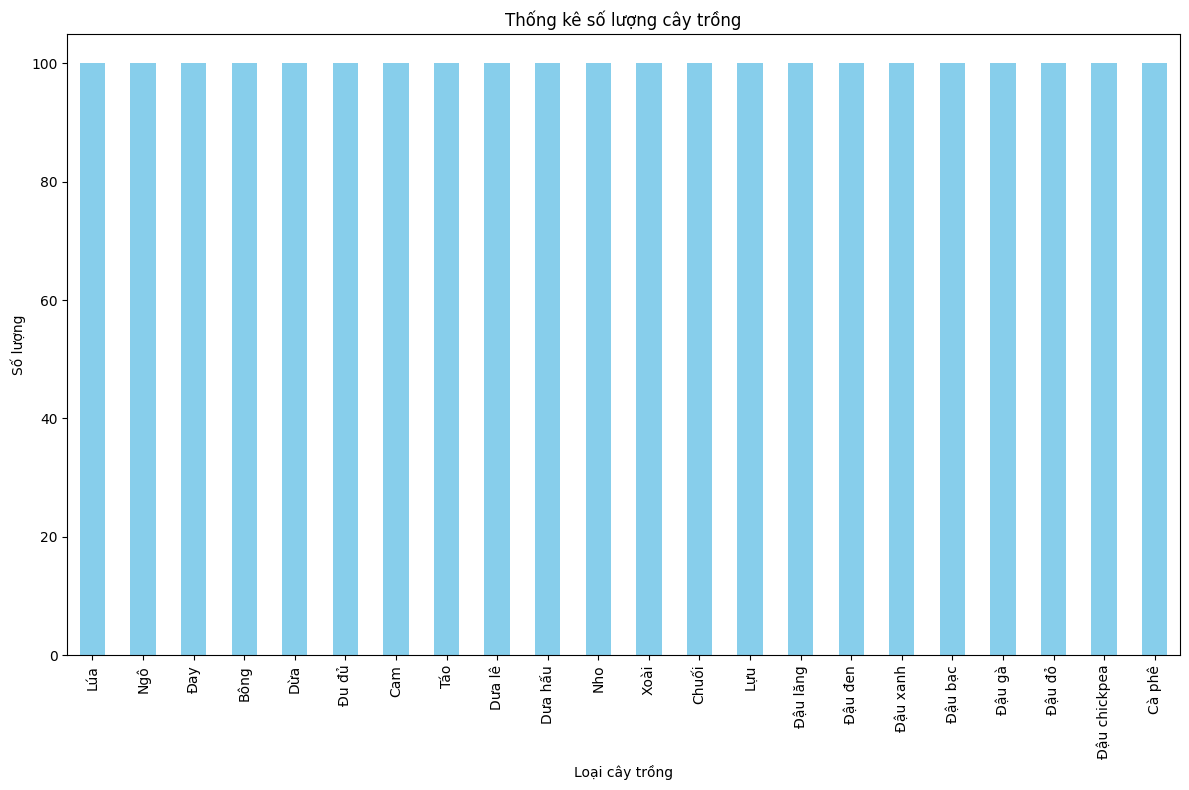

In [100]:
# Plot the bar chart
plt.figure(figsize=(12, 8))
label_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Loại cây trồng')
plt.ylabel('Số lượng')
plt.title('Thống kê số lượng cây trồng')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

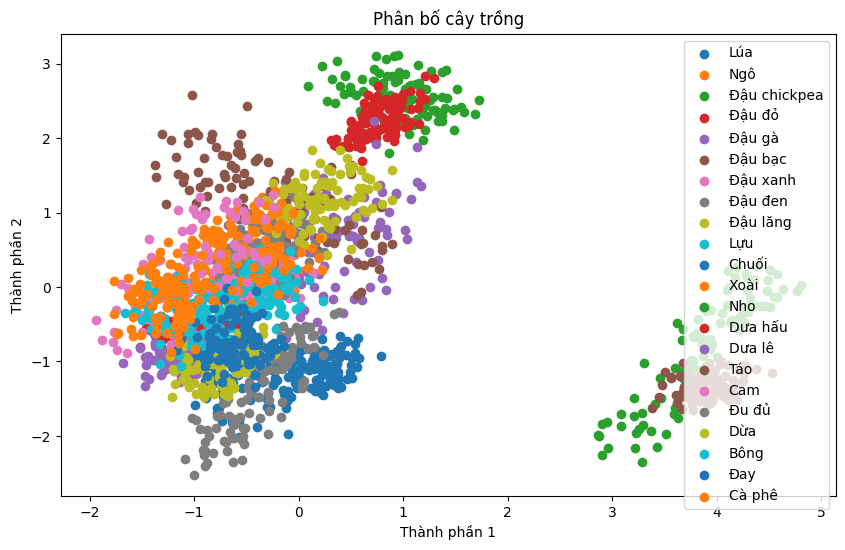

In [101]:
X = df.drop('label', axis=1)
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y

# Các nhãn (label) có trong tập dữ liệu
labels = pca_df['label'].unique()

plt.figure(figsize=(10, 6))
# Lặp qua từng nhãn và vẽ các điểm tương ứng
for label in labels:
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)

# Set labels and titles
plt.xlabel('Thành phần 1')
plt.ylabel('Thành phần 2')
plt.title('Phân bố cây trồng')
plt.legend()
plt.show()

In [102]:
X = df[['N', 'P', 'K', 'ph']].values
y = df['label'].values

In [103]:
X

array([[ 90.        ,  42.        ,  43.        ,   6.50298529],
       [ 85.        ,  58.        ,  41.        ,   7.03809636],
       [ 60.        ,  55.        ,  44.        ,   7.84020714],
       ...,
       [118.        ,  33.        ,  30.        ,   6.36260785],
       [117.        ,  32.        ,  34.        ,   6.75879255],
       [104.        ,  18.        ,  30.        ,   6.77983261]])

In [104]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [105]:
X_scaled

array([[ 1.0687974 , -0.34455075, -0.1016875 ,  0.04330173],
       [ 0.93332887,  0.14061552, -0.14118477,  0.73487256],
       [ 0.25598625,  0.04964684, -0.08193887,  1.77151047],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, -0.13812031],
       [ 1.80032743, -0.64777967, -0.27942519,  0.37390383],
       [ 1.44810927, -1.07230015, -0.35841972,  0.40109573]])

In [106]:
from sklearn.neighbors import NearestNeighbors

n_neighbors = 200
knn = NearestNeighbors(n_neighbors=n_neighbors, metric='minkowski', algorithm='brute')

knn.fit(X_scaled)

NearestNeighbors(algorithm='brute', n_neighbors=200)

In [107]:
# test data
new_data = np.array([[98, 56, 23, 7.1]])

new_data_scaled = scaler.transform(new_data)

# Search for nearest neighboring points
distances, indices = knn.kneighbors(new_data_scaled)

nearest_crops = y[indices[0]] # get names of the plants
nearest_distances = distances[0]

result_df = pd.DataFrame({'Crop': nearest_crops, 'Distance': nearest_distances})

# average score for each crop type
mean_distances = result_df.groupby('Crop')['Distance'].mean().reset_index()

# Sort by average distance from smallest to largest
mean_distances = mean_distances.sort_values(by='Distance')

print(mean_distances)

     Crop  Distance
2     Lúa  0.726622
0    Bông  0.735643
4     Đay  0.765276
3     Ngô  0.782339
1  Cà phê  0.826558
5   Đu đủ  0.958587


In [108]:
import joblib

# Lưu mô hình vào file
joblib.dump((knn, y), './model/KNN_model_v3.pkl')

['./model/KNN_model_v3.pkl']

In [109]:
# Để load lại mô hình từ file
knn_loaded, y_loaded = joblib.load('./model/KNN_model_v3.pkl')

In [110]:
N = 104
P = 18
K = 30
ph = 7.2

new_data = np.array([[N, P, K, ph]])

new_data_scaled = scaler.transform(new_data)

distances, indices = knn_loaded.kneighbors(new_data_scaled)
nearest_crops = y_loaded[indices[0]]
nearest_distances = distances[0]
result_df = pd.DataFrame({'Crop': nearest_crops, 'Distance': nearest_distances})

mean_distances = result_df.groupby('Crop')['Distance'].mean().reset_index()
mean_distances = mean_distances.sort_values(by='Distance')

print(mean_distances)

      Crop  Distance
1   Cà phê  0.666111
2  Dưa hấu  0.813894
0     Bông  0.850474
6      Đay  0.881838
3   Dưa lê  0.901316
4      Lúa  0.942635
5      Ngô  0.969375
